In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
df.head(11)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
5,50888,C1,1329,Rented,Individual,24,24,No,X2,NaN,NaN,18,6150.0
6,50889,C2,3479,Owned,Individual,56,56,No,X5,14+,4.0,17,19152.0
7,50890,C13,396,Rented,Individual,41,41,No,NaN,NaN,NaN,16,11034.0
8,50891,C18,513,Owned,Individual,22,22,No,X3,NaN,NaN,22,10784.0
9,50892,C3,957,Owned,Joint,41,37,Yes,X5,6.0,1.0,22,16934.4


In [ ]:
df.shape

(21805, 13)

In [ ]:
df.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

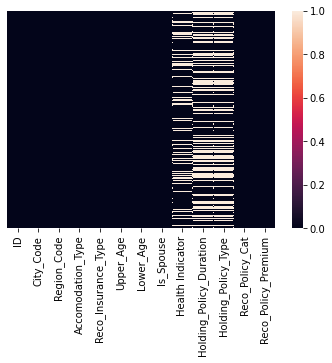

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [ ]:
#rename the column for ease
df.rename(columns = {'Health Indicator':'Health_Indicator'}, inplace = True) 

In [ ]:
#count the distinct values in categorical column
print(df.City_Code.unique())
print(df.Accomodation_Type.unique())
print(df.Reco_Insurance_Type.unique())
print(df.Is_Spouse.unique())
print(df.Health_Indicator.unique())
print(df.Holding_Policy_Duration.unique())

['C1' 'C4' 'C3' 'C2' 'C13' 'C18' 'C16' 'C17' 'C11' 'C7' 'C21' 'C34' 'C14'
 'C8' 'C12' 'C6' 'C10' 'C9' 'C23' 'C32' 'C26' 'C15' 'C24' 'C20' 'C19' 'C5'
 'C28' 'C30' 'C25' 'C29' 'C27' 'C33' 'C22' 'C36' 'C35' 'C31']
['Owned' 'Rented']
['Individual' 'Joint']
['No' 'Yes']
[nan 'X1' 'X3' 'X2' 'X5' 'X4' 'X7' 'X6' 'X9' 'X8']
['6.0' '3.0' '2.0' nan '14+' '5.0' '1.0' '4.0' '12.0' '11.0' '7.0' '9.0'
 '13.0' '8.0' '14.0' '10.0']


In [ ]:
#Handle missing categorical data using Mode
df['Health_Indicator'] = df['Health_Indicator'].fillna(df['Health_Indicator'].mode()[0])
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0])

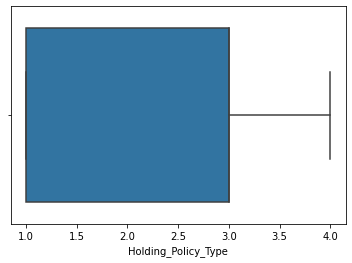

In [ ]:
#Finding outliers in the dataset
sns.boxplot(x=df['Holding_Policy_Type'])

In [ ]:
#No outliers , so replace it with mean
df['Holding_Policy_Type']= df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mean())

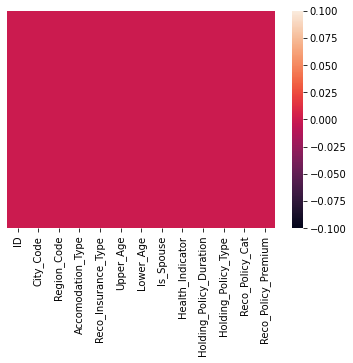

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [ ]:
df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [ ]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.000000,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.000000,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.000000,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.000000,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,14+,2.440085,5,22534.0


In [ ]:
#convert from categorical data to one hot encoded data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df['City_Code'] = le.fit_transform(df['City_Code'])
df['Accomodation_Type'] = le.fit_transform(df['Accomodation_Type'])
df['Reco_Insurance_Type'] = le.fit_transform(df['Reco_Insurance_Type'])
df['Is_Spouse'] = le.fit_transform(df['Is_Spouse'])
#df['Health_Indicator'] = le.fit_transform(df['Health_Indicator'])
#df['Holding_Policy_Duration'] = le.fit_transform(df['Holding_Policy_Duration'])

In [ ]:
df.drop(['City_Code'],axis = 1,inplace = True)
df.drop(['ID'],axis = 1,inplace = True)
df.drop(['Region_Code'],axis = 1,inplace = True)

In [ ]:
df.shape

(21805, 10)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(df))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 3.0 5 11934.0]
 [1.0 0.0 0.0 ... 3.0 18 32204.8]
 [0.0 0.0 1.0 ... 4.0 17 9240.0]
 ...
 [0.0 0.0 1.0 ... 2.440084835630965 1 17836.0]
 [0.0 0.0 0.0 ... 1.0 19 11568.0]
 [0.0 1.0 0.0 ... 2.0 3 23040.0]]


In [ ]:
X_new = pd.DataFrame(X) 
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,0,0,0,0,0,0,0,0,30,30,0,6.0,3,5,11934
1,1,0,0,0,0,0,0,0,0,0,1,69,68,1,3.0,3,18,32204.8
2,0,0,1,0,0,0,0,0,0,1,0,28,28,0,2.0,4,17,9240
3,0,0,1,0,0,0,0,0,0,1,0,23,23,0,3.0,3,18,9086
4,0,0,1,0,0,0,0,0,0,0,0,75,75,0,14+,2.44008,5,22534


In [ ]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [14])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))

In [ ]:
X_new = pd.DataFrame(X) 
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,30,0,3,5,11934
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,69,68,1,3,18,32204.8
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,28,28,0,4,17,9240
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,23,23,0,3,18,9086
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,75,75,0,2.44008,5,22534


In [ ]:
X_new.shape

(21805, 32)

In [ ]:
X_new.to_csv('/content/sample_data/new_test.csv',index=False)